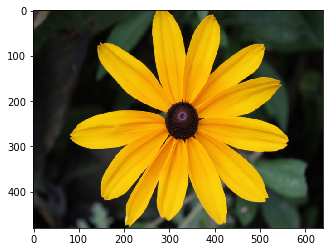

Color: greenish - Format: jpg - Size: medium - Tag: flower - Mode: landscape
Do you like this image? Y/n y


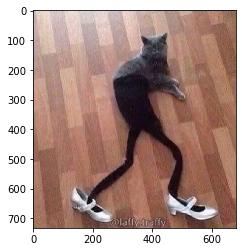

Color: reddish - Format: png - Size: medium - Tag: meme - Mode: portrait
Do you like this image? Y/n y


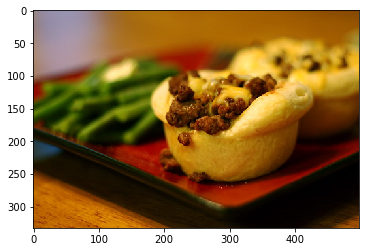

Color: reddish - Format: jpg - Size: medium - Tag: food - Mode: landscape
Do you like this image? Y/n n


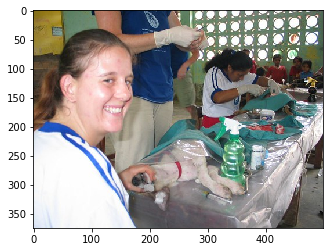

Color: bluish - Format: jpg - Size: medium - Tag: animal - Mode: landscape
Do you like this image? Y/n y


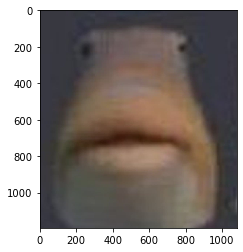

Color: greenish - Format: jpg - Size: large - Tag: meme - Mode: portrait
Do you like this image? Y/n n


Here are the images you might like :)

testimages/ressource (142).jpgColor: bluish - Format: jpg - Size: medium - Tag: food - Mode: landscape


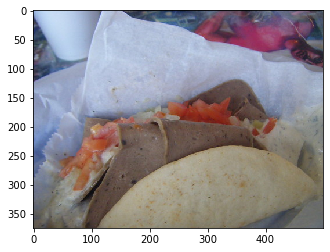

testimages/ressource (87).jpgColor: bluish - Format: jpg - Size: medium - Tag: food - Mode: landscape


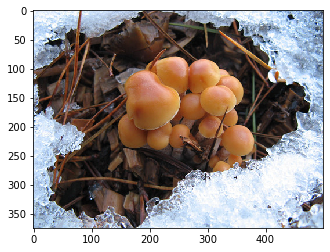

testimages/ressource (110).jpgColor: bluish - Format: jpg - Size: medium - Tag: food - Mode: landscape


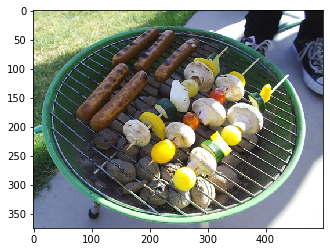

testimages/ressource (121).jpgColor: greenish - Format: jpg - Size: medium - Tag: food - Mode: landscape


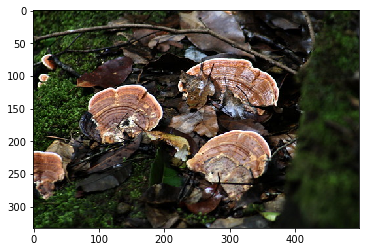

testimages/ressource (85).jpgColor: greenish - Format: jpg - Size: medium - Tag: food - Mode: landscape


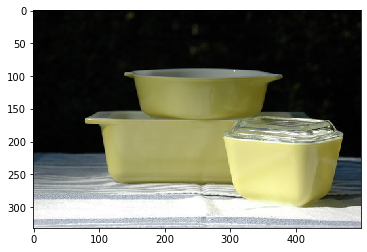

testimages/ressource (152).jpgColor: greenish - Format: jpg - Size: medium - Tag: meme - Mode: landscape


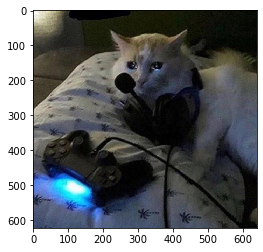

testimages/ressource (89).jpgColor: greenish - Format: jpg - Size: medium - Tag: food - Mode: landscape


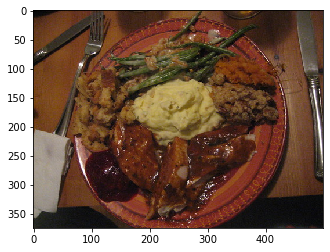

testimages/ressource (135).jpgColor: bluish - Format: jpg - Size: medium - Tag: food - Mode: landscape


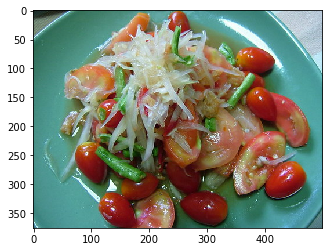

testimages/ressource (2).pngColor: reddish - Format: png - Size: medium - Tag: meme - Mode: portrait


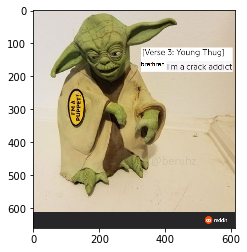

testimages/ressource (1).PNGColor: reddish - Format: png - Size: medium - Tag: meme - Mode: landscape


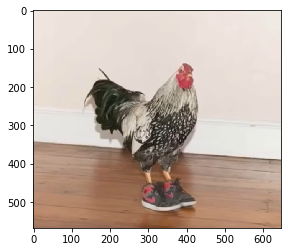

testimages/ressource (138).jpgColor: bluish - Format: jpg - Size: medium - Tag: animal - Mode: landscape


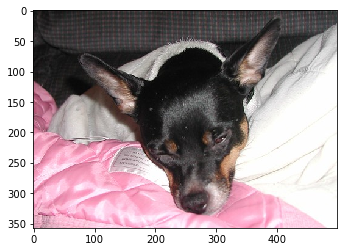

testimages/ressource (104).jpgColor: bluish - Format: jpg - Size: medium - Tag: food - Mode: landscape


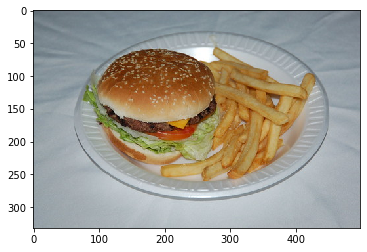

testimages/ressource (129).jpgColor: greenish - Format: jpg - Size: medium - Tag: food - Mode: landscape


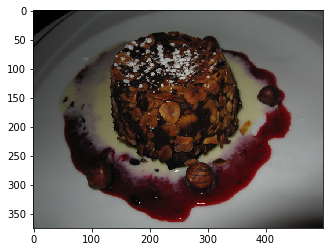

testimages/ressource (123).jpgColor: greenish - Format: jpg - Size: medium - Tag: food - Mode: landscape


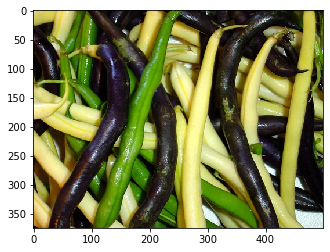

testimages/ressource (140).jpgColor: reddish - Format: jpg - Size: medium - Tag: animal - Mode: landscape


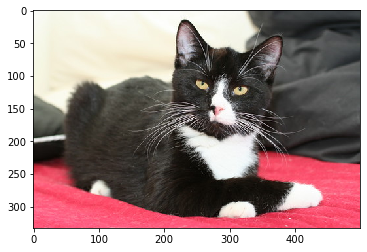

testimages/ressource (99).jpgColor: greenish - Format: jpg - Size: medium - Tag: animal - Mode: portrait


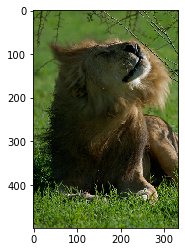

testimages/ressource (77).jpgColor: greenish - Format: jpg - Size: medium - Tag: meme - Mode: landscape


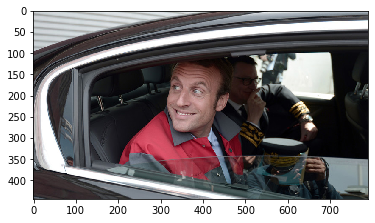

testimages/ressource (97).jpgColor: reddish - Format: jpg - Size: medium - Tag: animal - Mode: landscape


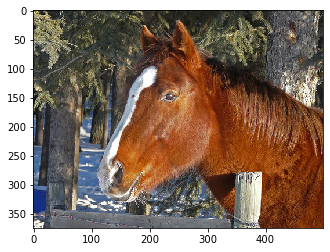

testimages/ressource (4).PNGColor: bluish - Format: png - Size: medium - Tag: meme - Mode: landscape


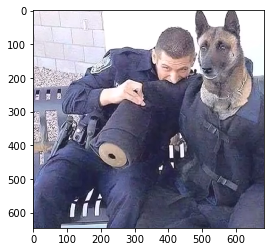

testimages/ressource (145).jpgColor: greenish - Format: jpg - Size: medium - Tag: food - Mode: landscape


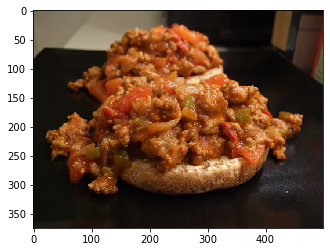

testimages/ressource (117).jpgColor: bluish - Format: jpg - Size: medium - Tag: food - Mode: landscape


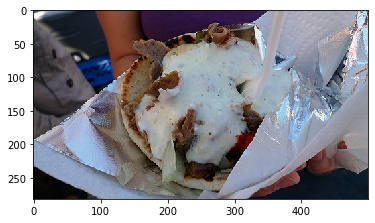

testimages/ressource (106).jpgColor: greenish - Format: jpg - Size: medium - Tag: food - Mode: landscape


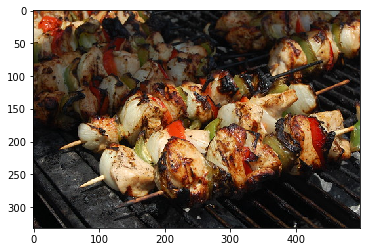

testimages/ressource (119).jpgColor: reddish - Format: jpg - Size: medium - Tag: animal - Mode: landscape


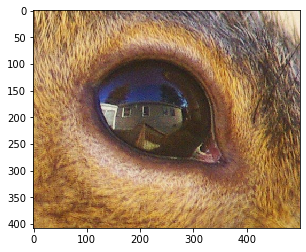

testimages/ressource (139).jpgColor: greenish - Format: jpg - Size: medium - Tag: food - Mode: landscape


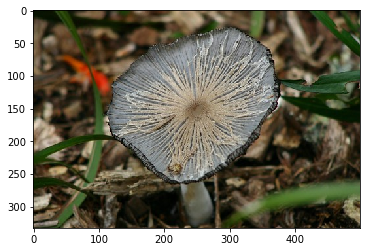

testimages/ressource (6).PNGColor: reddish - Format: png - Size: medium - Tag: meme - Mode: portrait


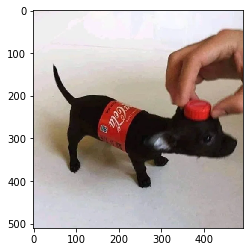

testimages/ressource (5).PNGColor: bluish - Format: png - Size: medium - Tag: meme - Mode: landscape


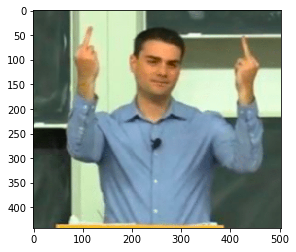

testimages/ressource (141).jpgColor: bluish - Format: jpg - Size: medium - Tag: animal - Mode: landscape


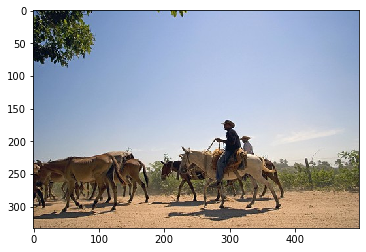

testimages/ressource (88).jpgColor: greenish - Format: jpg - Size: medium - Tag: food - Mode: landscape


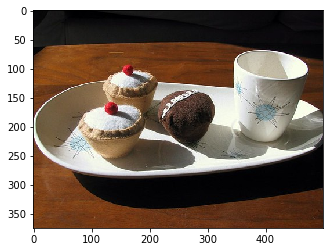

testimages/ressource (103).jpgColor: greenish - Format: jpg - Size: medium - Tag: food - Mode: landscape


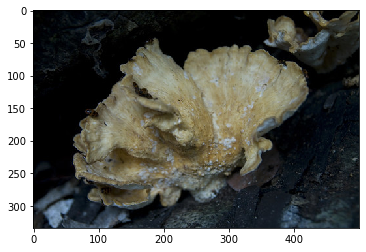

End


In [9]:
from PIL import Image
import numpy
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn import svm
import json
import random 
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import display
from collections import namedtuple

defaultJsonFile = 'default.json'
images = dict()

seenColors = set()
seenFormats = set()
seenSizes = set()
seenTags = set()
seenModes = set()

# init size
smallSize = 100000
mediumSize = 500000

nbImages = 2
done = False
nbLiked = 0
nbNotLiked = 0

data = []
result = []

#rgb
xColor = [[186, 0, 13], [255, 121, 97], [244, 67, 54],[69, 39, 160],[121, 83, 210],[0, 51, 0],[27, 94, 32],[255, 0, 0],[0, 255, 0],[0, 0, 255]]
yColor = [0,0,0,2,2,1,1,0,1,2]

clfColor = svm.SVC()
clfColor.fit(xColor, yColor)

with open(defaultJsonFile,'rt') as json_file:
    parsed_json = (json.loads(json_file.read()))
    
    random.shuffle(parsed_json)

    for line in parsed_json:
        images[line['path']] = Image.open(line['path'])

    i = 0

    while not done:

        imgPath = list(images.keys())[i]
        json_image = parsed_json[i]
        
        predictionColor = clfColor.predict([json_image['color']])
        if(predictionColor == 0):
            color = 'reddish'
        elif(predictionColor == 1):
            color = 'greenish'
        elif(predictionColor == 2):
            color = 'bluish'
        else:
            color = 'unknown'
        
        format_type = json_image['path'].split('.')[1].lower()
        
        nbPixels = json_image['size'][0] * json_image['size'][1]
        if(nbPixels<=smallSize):
            size = "thumbnail"
        elif(nbPixels<=mediumSize):
            size = "medium"
        else:
            size = "large"
            
        tag = parsed_json[i]['tags'][0]
        
        if(json_image['size'][0] == json_image['size'][1]):
            mode = "square"
        elif(json_image['size'][0] > json_image['size'][1]):
            mode = "landscape"
        else:
            mode = "portrait"
            
        data.append([color,format_type,size,tag,mode])
        seenColors.add(color)
        seenFormats.add(format_type)
        seenSizes.add(size)
        seenTags.add(tag)
        seenModes.add(mode)
        
        img=mpimg.imread(imgPath)
        imgplot = plot.imshow(img)
        plot.show()
        
        print("Color: " + color + " - Format: " + format_type + " - Size: " + size + " - Tag: " + tag + " - Mode: " + mode )

        imageStatus = input("Do you like this image? Y/n ")
        if imageStatus.lower() in ("n", "no"):
            # add image to not liked
            result.append("NotFavorite")
            nbNotLiked += 1
        else:
            # add image to liked
            result.append("Favorite")
            nbLiked += 1  

        if(nbLiked >= nbImages and nbNotLiked >= nbImages):
            done = True
            
        i += 1

    #print(str(data))
    #print(str(result))
    
    #creating dataframes
    dataframe = pd.DataFrame(data, columns=['color', 'format', 'size', 'tag', 'mode'])
    resultframe = pd.DataFrame(result, columns=['favorite'])
    
    #generating numerical labels
    colorEncoder = LabelEncoder()
    dataframe['color'] = colorEncoder.fit_transform(dataframe['color'])
    formatEncoder = LabelEncoder()
    dataframe['format'] = formatEncoder.fit_transform(dataframe['format'])
    sizeEncoder = LabelEncoder()
    dataframe['size'] = sizeEncoder.fit_transform(dataframe['size'])
    tagEncoder = LabelEncoder()
    dataframe['tag'] = tagEncoder.fit_transform(dataframe['tag'])
    modeEncoder = LabelEncoder()
    dataframe['mode'] = modeEncoder.fit_transform(dataframe['mode'])
    resultEncoder = LabelEncoder()
    resultframe['favorite'] = resultEncoder.fit_transform(resultframe['favorite'])
    
    #Use of random forest classifier
    rfc = RandomForestClassifier(n_estimators=10, max_depth=2,
    random_state=0)
    rfc = rfc.fit(dataframe, resultframe.values.ravel())
    
    print()
    print()
    print("Here are the images you might like :)")
    print()
    
    for j in range(i,len(parsed_json)):                 
    
        json_image = parsed_json[j]
        
        predictionColor = clfColor.predict([json_image['color']])
        if(predictionColor == 0):
            color = 'reddish'
        elif(predictionColor == 1):
            color = 'greenish'
        elif(predictionColor == 2):
            color = 'bluish'
        else:
            color = 'unknown'
        
        format_type = json_image['path'].split('.')[1].lower()
        
        nbPixels = json_image['size'][0] * json_image['size'][1]
        if(nbPixels<=smallSize):
            size = "thumbnail"
        elif(nbPixels<=mediumSize):
            size = "medium"
        else:
            size = "large"
            
        tag = parsed_json[j]['tags'][0]
        
        if(json_image['size'][0] == json_image['size'][1]):
            mode = "square"
        elif(json_image['size'][0] > json_image['size'][1]):
            mode = "landscape"
        else:
            mode = "portrait"

        if(color in seenColors and format_type in seenFormats and size in seenSizes and tag in seenTags and mode in seenModes):

            #prediction
            prediction = rfc.predict([
                [colorEncoder.transform([color])[0], 
                 formatEncoder.transform([format_type])[0],
                 sizeEncoder.transform([size])[0],
                 tagEncoder.transform([tag])[0],
                 modeEncoder.transform([mode])[0]]])

            if(resultEncoder.inverse_transform(prediction)[0] == "Favorite"):   
                print(str(json_image['path']) + " - Color: " + color + " - Format: " + format_type + " - Size: " + size + " - Tag: " + tag + " - Mode: " + mode)
                
                imgPath = list(images.keys())[j]
                img=mpimg.imread(imgPath)
                imgplot = plot.imshow(img)
                plot.show()
                
    
    print("End")